In [2]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 52.4 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

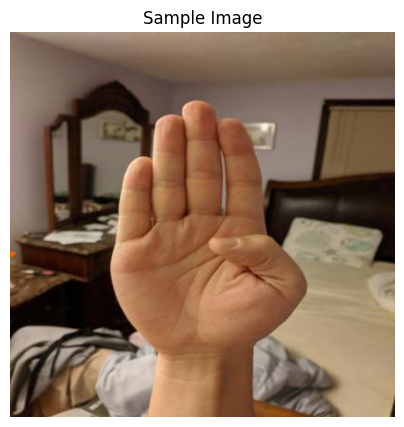

In [45]:
# Reading the sample image on which we will perform the detection
sample_img = cv2.imread('/content/drive/MyDrive/AmericanSignLanguage/test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg')

# Here we are specifing the size of the figure i.e. 10 -height; 10- width.
plt.figure(figsize = [5, 5])

# Here we will display the sample image as the output.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [46]:
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

def findPose(self, img, draw=True):
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    self.results = self.pose.process(imgRGB)
    if self.results.pose_landmarks:
        if draw:
            self.mpDraw.draw_landmarks(img, self.results.pose_landmarks,
                                       self.mpPose.POSE_CONNECTIONS,
            self.mpDraw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
            self.mpDraw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
    return img

if results.multi_hand_landmarks:

   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.49490809440612793
y: 0.8356293439865112
z: 7.420614451802976e-07

THUMB_CMC:
x: 0.6181991696357727
y: 0.7628191113471985
z: -0.07441623508930206



In [47]:
image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 205.88176727294922
y: 347.6218070983887
z: 0.0003086975611950038n
THUMB_CMC:
x: 257.17085456848145
y: 317.33275032043457
z: -30.957153797149658n


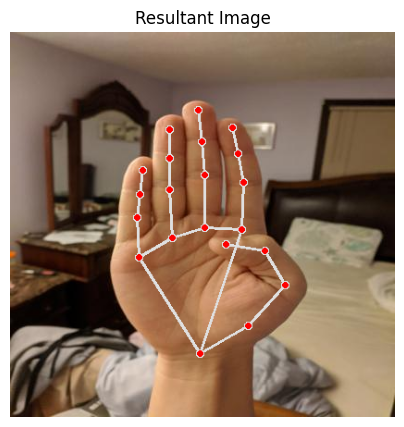

In [49]:
img_copy = sample_img.copy()

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [5, 5])

    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()